# Exploratory Data Analysis

Step 1: Import and read data
<br> Step 2: Check datatypes
<br> Step 3: Check duplicates
<br> Step 4: Check nulls/missing values
<br> Step 5: Check outliers



**Step 1: Import and read data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
incomes = pd.read_csv('incomes.csv')
# incomes.columns = [col.strip() for col in list(incomes.columns)]

incomes.head()

,income per capita,city
0,"$134,387.00",Hunts Point
1,"$129,137.00",Yarrow Point
2,"$106,393.00",Medina
3,"$102,990.00",Methow
4,"$89,107.00",Clyde Hill


In [4]:
city_names = pd.read_csv('city_names.csv')
city_names = city_names[city_names['County']=='King']
city_names.columns = [col.lower().replace(" ", "") for col in list(city_names.columns)]
city_names.columns
 

Index(['zipcode', 'city', 'county'], dtype='object')

In [5]:
city_incomes = city_names.merge(incomes, on ='city' )
data = data.merge(city_incomes, on ='zipcode' )
data.columns = [col.replace(" ", "_") for col in list(data.columns)]

data['city'].value_counts()

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Kirkland          977
Redmond           977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: city, dtype: int64

**Step 2: Check datatypes**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               21597 non-null  object 
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   waterfront         19221 non-null  float64
 8   view               21534 non-null  float64
 9   condition          21597 non-null  int64  
 10  grade              21597 non-null  int64  
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  object 
 13  yr_built           21597 non-null  int64  
 14  yr_renovated       17755 non-null  float64
 15  zipcode            21597 non-null  int64  
 16  lat                215

Strangely, `bathrooms` is a float. Also `income_per_capita` and `sqft_basement` are objects

In [7]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [8]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
65.0          1
172.0         1
652.0         1
2130.0        1
516.0         1
Name: sqft_basement, Length: 304, dtype: int64

We will have to fix the `?` value.

**Step 3: Check duplicates**

In [9]:
data.duplicated().sum()

0

No duplicates.

**Step 4: Check nulls/missing values**

In [10]:
data.isnull().sum()

date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
city                    0
county                  0
income_per_capita       0
dtype: int64

We will have to take a deeper look into `waterfront`, `yr_renovated`, and `view` to handle the nulls

In [11]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

There aren't enough homes with waterfront views to justify continuing to evaluate this variable as a predictor. 


**Step 5: Check outliers**

In [12]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


All of the `sqft_` variables seem to have outliers we want to handle. As well, `bedrooms` has high outlier of 33. 

In [13]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,county,income_per_capita
5423,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,1947,0.0,98103,47.6878,-122.331,1330,4700,Seattle,King,"$44,167.00"


Check distribution (boxplots) of `continuous_features` (`sqft_` variables and `bedrooms`)

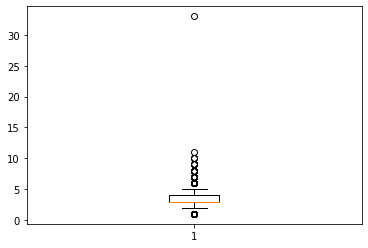

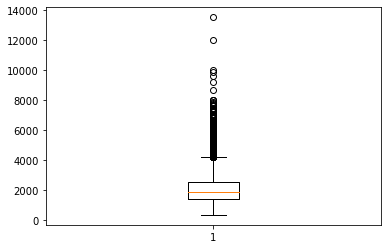

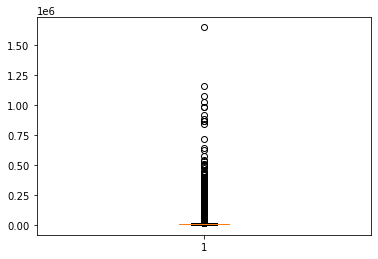

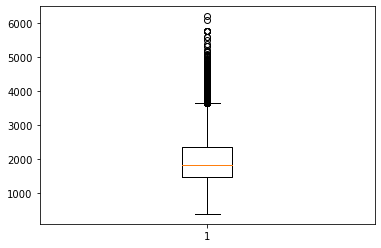

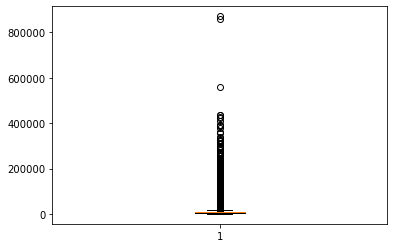

In [14]:
outliers = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

for outlier in outliers:
    plt.figure()
    plt.boxplot(data[outlier])

# Data Cleaning

Step 1: Fix structural errors (bathroom and sqft_basement values) 
<br> Step 2: Handle missing data 
<br> Step 3: Filter unwanted outliers
<br> Step 4: Modify and/or remove irrelevant observations

**Step 1: Fix structural errors (bathroom and sqft_basement values)**

In [15]:
data['income_per_capita']=data['income_per_capita'].map(lambda x: float(x[1:].replace(",","")))
data['income_per_capita'].value_counts()

44167.0     8973
32136.0     1597
50405.0     1407
25497.0     1201
48902.0      977
50787.0      977
26918.0      911
56662.0      800
27145.0      779
49532.0      733
36447.0      589
51067.0      471
48885.0      308
39387.0      283
75396.0      282
27381.0      233
36460.0      220
38841.0      195
38805.0      190
29323.0      124
42129.0      117
32301.0      100
34603.0       80
106393.0      50
Name: income_per_capita, dtype: int64

In [16]:
data['bathrooms']=round(data['bathrooms']*2)/2
data['bathrooms'].value_counts()

2.0    7025
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
7.0       2
6.5       2
7.5       1
Name: bathrooms, dtype: int64

In [17]:
data = data[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1816.0        1
2720.0        1
1008.0        1
2250.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

**Step 2: Handle missing data**

In [18]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

**Step 3: Filter unwanted outliers**

Define upper and lower limits as 3 standard deviations away from the mean 

In [19]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit


def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit


Removing outliers from continuous `sqft` variables


In [20]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) 
            & (data['sqft_living'] <= upper_limit(data['sqft_living']))]


In [21]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) 
            & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [22]:

data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) 
            & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [23]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) 
            & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

Remove outlier from bedroom data 

In [24]:
data = data[(data['bedrooms']!=33)]

In [25]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,income_per_capita
count,2.013100e+04,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,17898.000000,20075.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000
mean,5.149142e+05,3.351249,2.096990,2004.862699,9812.499131,1.484973,0.006090,0.207073,3.415081,7.584770,1724.094779,280.767920,1970.377428,68.119169,98079.398838,47.561887,-122.220609,1935.779147,8945.089265,42371.935622
std,3.007539e+05,0.891515,0.719154,791.707318,10592.249126,0.539830,0.077803,0.718817,0.652390,1.081711,731.997899,419.546462,29.403734,362.416752,53.839269,0.138149,0.135915,617.109881,7602.766529,9500.433854
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,25497.000000
25%,3.180000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.474300,-122.331000,1470.000000,5001.000000,36447.000000
50%,4.445000e+05,3.000000,2.000000,1880.000000,7462.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1973.000000,0.000000,98072.000000,47.574000,-122.242000,1810.000000,7500.000000,44167.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,10067.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,550.000000,1996.000000,0.000000,98118.000000,47.679500,-122.137000,2310.000000,9705.000000,48902.000000
max,3.640000e+06,11.000000,7.500000,4830.000000,130680.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4830.000000,2300.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3930.000000,56827.000000,106393.000000


The unwanted outliers have been removed.

**Step 4: Modify and/or remove irrelevant observations**

Turn `basement` and `yr_renovated` variables into boolean `has_basement and `is_renovated`. 

In [26]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)
data['age']=2021-data['yr_built']

Use `date` to get `season` column

In [27]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,city,county,income_per_capita,has_basement,is_renovated,age,month,season
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,...,1340,5650,Seattle,King,44167.0,False,False,66,10,fall
1,2014-06-23,205425.0,2,1.0,880,6780,1.0,0.0,0.0,4,...,1190,6780,Seattle,King,44167.0,False,False,76,6,spring
2,2014-07-17,445000.0,3,2.0,2100,8201,1.0,NaN,2.0,3,...,2660,8712,Seattle,King,44167.0,True,False,54,7,summer
3,2014-09-25,236000.0,3,1.0,1300,5898,1.0,NaN,0.0,3,...,1320,7619,Seattle,King,44167.0,False,False,60,9,summer
4,2015-02-27,170000.0,2,1.0,860,5265,1.0,0.0,0.0,3,...,1650,8775,Seattle,King,44167.0,False,False,90,2,winter


Drop variables that will not be part of the model

In [28]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','yr_built',
           'sqft_basement', 'county','grade'], axis=1, inplace=True)

After including `grade` in our third iteration of the model,  we realized it's best to drop it due to its high collinearity (.73) with sqft_living. 

# Post-cleaning exploratory data analysis

Look at the correlations of each columns with price.

In [29]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price                1.000000
sqft_living          0.646800
sqft_living15        0.559596
income_per_capita    0.494139
bathrooms            0.460189
lat                  0.363181
bedrooms             0.294626
floors               0.252868
has_basement         0.180632
is_renovated         0.126962
sqft_lot15           0.121899
sqft_lot             0.114814
condition            0.057957
age                  0.022790
long                 0.003159
Name: price, dtype: float64

Create a heat map to identify correlation between variables to look for issues with multicollinearity.

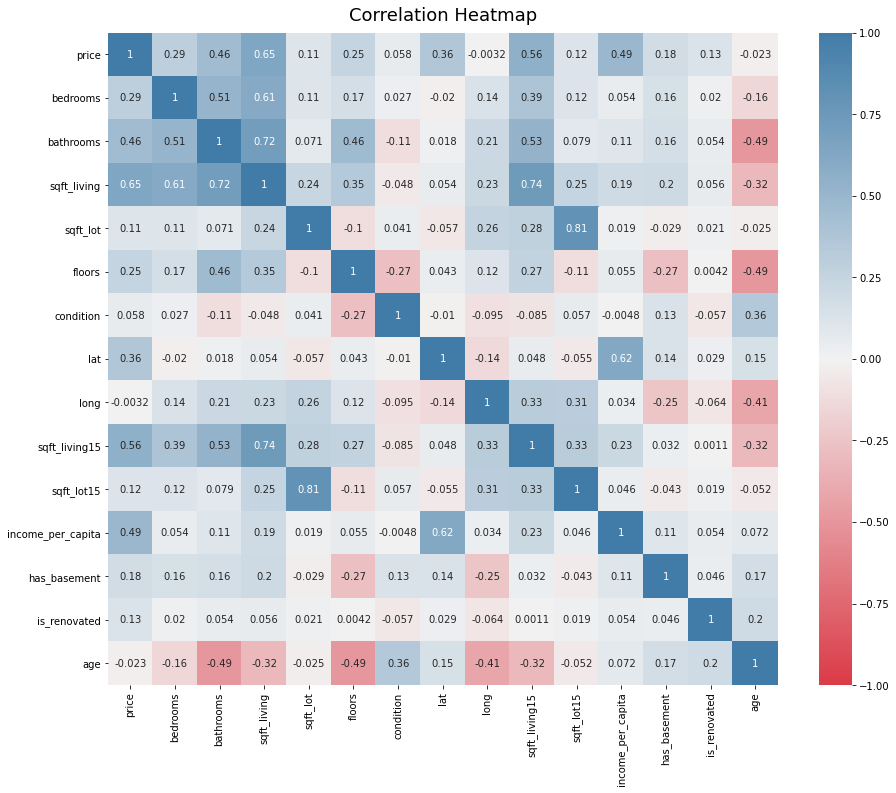

In [30]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Drop the `sqft_living15` and `sqft_lot15` as they are highly correlated with `sqft_living` and `sqft_lot`.

In [31]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)


**Check distribution of discrete variables**

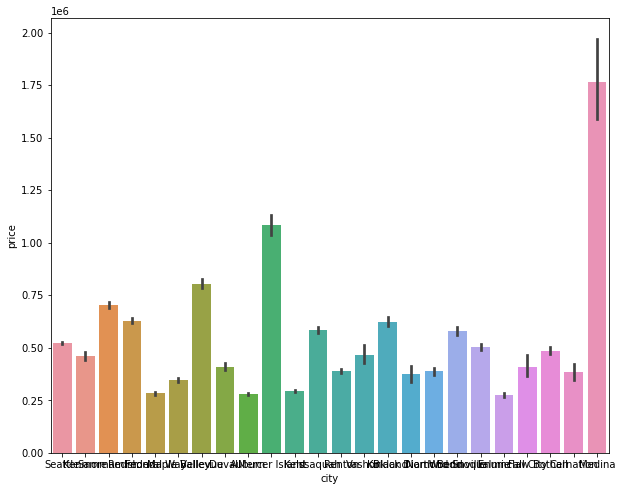

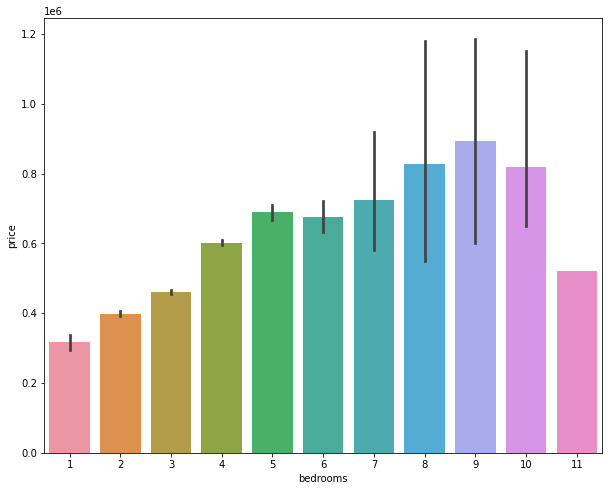

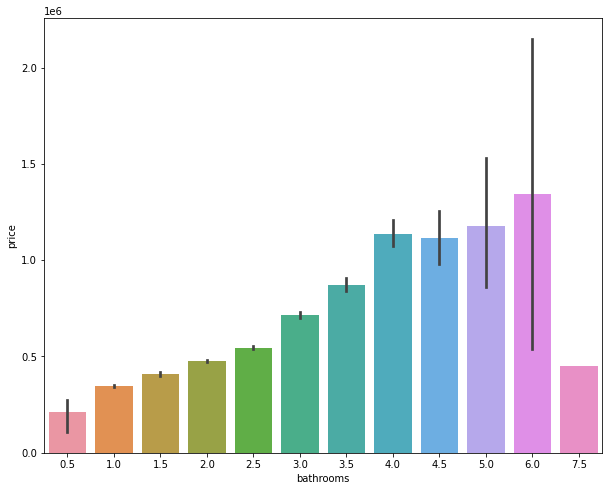

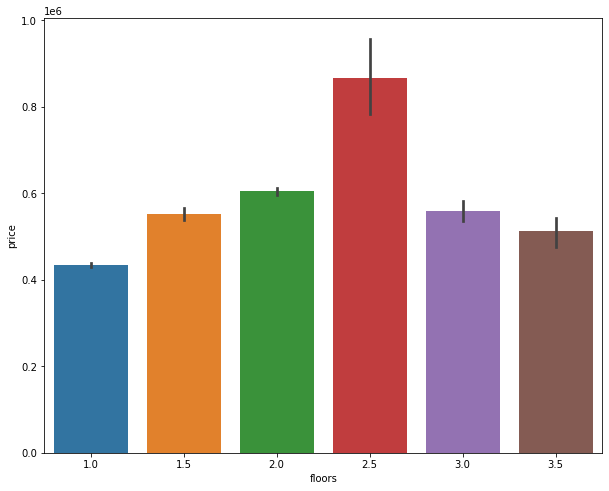

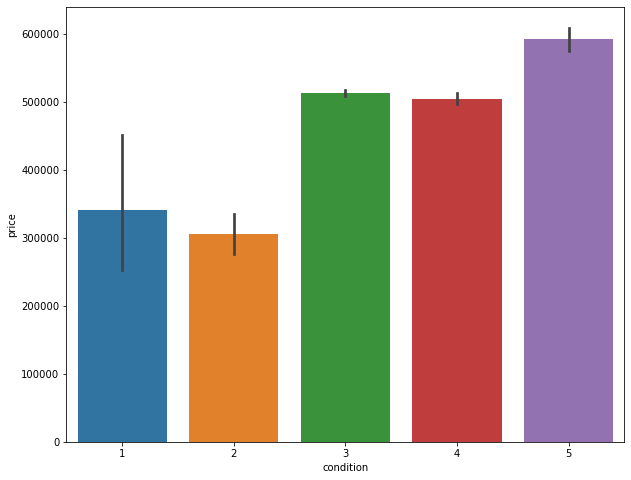

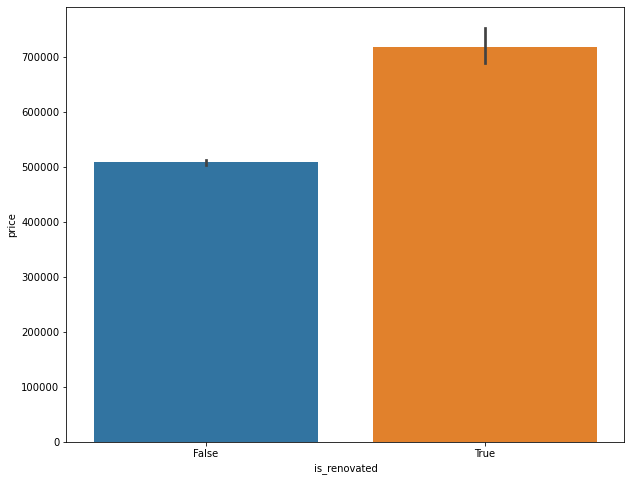

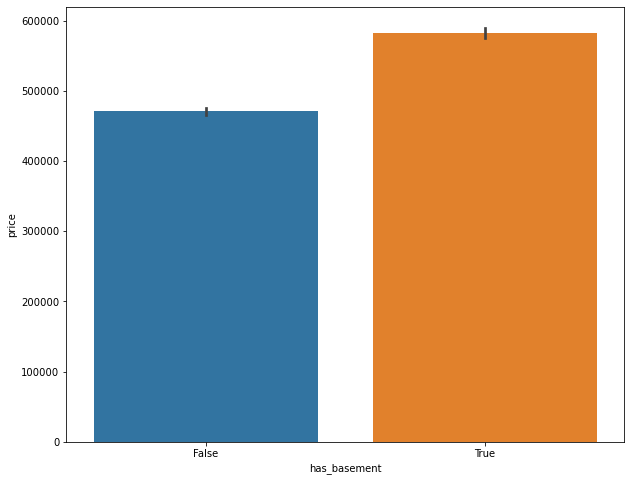

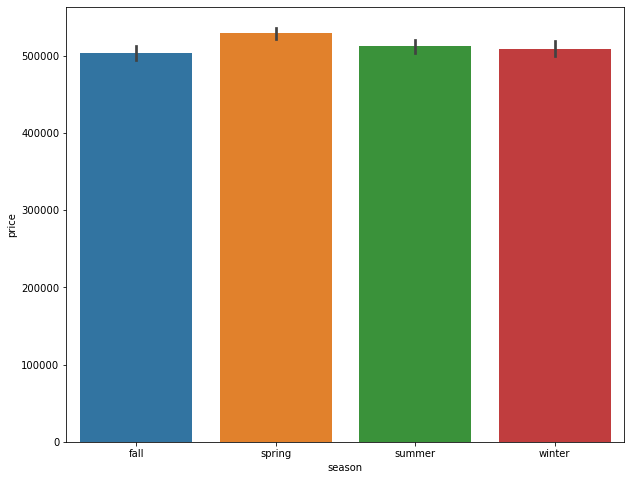

In [32]:
discrete_features = ['city','bedrooms', 'bathrooms', 'floors', 'condition', 'is_renovated','has_basement', 'season']

for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)

Drop `season` since price doesn't really change between seasons. 

In [33]:
data.drop(['season','city'], axis=1, inplace=True)

# Preprocessing

**Create dummy variables**

In [34]:
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20131 non-null  float64
 1   bedrooms           20131 non-null  int64  
 2   bathrooms          20131 non-null  float64
 3   sqft_living        20131 non-null  int64  
 4   sqft_lot           20131 non-null  int64  
 5   floors             20131 non-null  float64
 6   condition          20131 non-null  int64  
 7   lat                20131 non-null  float64
 8   long               20131 non-null  float64
 9   income_per_capita  20131 non-null  float64
 10  age                20131 non-null  int64  
 11  is_renovated_True  20131 non-null  uint8  
 12  has_basement_True  20131 non-null  uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 2.4 MB


**Train-Test Split**

In [35]:
y = dummy['price']
X = dummy.drop(['price'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


16104 4027 16104 4027


# Modeling

Regression 0 : Trial Regression 
<br>  - simple baseline using `sqft_living` to get understanding of data
<br>  - calculate and observe MSE 

Regression 1 : Standardized Variablies
<br>  - standardize variables and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE 
<br>  - Model Validation : Test normality (QQ Plot)  

<br>Regression 2 : Using Log-Scaled & Standardized Variables 
<br>  - log variables, standardize variables, and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and Homoskedasity (QQ Plot and regression against one regressor)

<br>Regression 3 : Recursive Feature Elimination
<br>  - Use RFE to eliminate "useless" estimators and fit model to new equation
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and Homoskedasity (QQ Plot and regression against one regressor)

**Regression 0: Trial Regression**

In [38]:
pred = sm.add_constant(X_train['sqft_living'])
model = sm.OLS(endog=y_train, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.179e+04
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:09:39   Log-Likelihood:            -2.2159e+05
No. Observations:               16104   AIC:                         4.432e+05
Df Residuals:                   16102   BIC:                         4.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.982e+04   4895.763      4.048      0.000    1.02e+04    2.94e+04
sqft_living   246.7037      2.272    108.597      0.000     242.251     251.157
==============================================================================
Omnibus:                     7455.279   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76163.296
Skew:                           1.968   Prob(JB):                         0.00
Kurtosis:                      12.900   Cond. No.                     5.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the baseline regression we chose `sqft_living` as our variable since it had the highest coefficient. The R2 is .42. We will see how much this increases with the future iterations of this model. 

In [39]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20131 non-null  float64
 1   bedrooms           20131 non-null  int64  
 2   bathrooms          20131 non-null  float64
 3   sqft_living        20131 non-null  int64  
 4   sqft_lot           20131 non-null  int64  
 5   floors             20131 non-null  float64
 6   condition          20131 non-null  int64  
 7   lat                20131 non-null  float64
 8   long               20131 non-null  float64
 9   income_per_capita  20131 non-null  float64
 10  age                20131 non-null  int64  
 11  is_renovated_True  20131 non-null  uint8  
 12  has_basement_True  20131 non-null  uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 2.4 MB


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = dummy[['income_per_capita','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','age']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0  income_per_capita  17.941718
1           bedrooms  23.011368
2          bathrooms  24.869269
3        sqft_living  19.582651
4           sqft_lot   2.042221
5             floors  10.723329
6          condition  22.631433
7                age   6.425635


Calculated the train and test mean squared error for comparison

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_sqft = X_train['sqft_living'].values.reshape(-1, 1)    
X_test_sqft = X_test['sqft_living'].values.reshape(-1, 1)    

linreg = LinearRegression() 
linreg.fit(X_train_sqft, y_train)

y_hat_train = linreg.predict(X_train_sqft)
y_hat_test = linreg.predict(X_test_sqft)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)


Train Mean Squared Error: 52398162606.92511
Test Mean Squared Error: 53458254752.72048


A few observation with this extremely high Mean Squared Error:
<br> 1. The difference between the train and test MSE isn't high, so it validated our train and test datasets.
<br> 2. The extremely high MSE lead us to do feature engineering in 2 phases: first scaling, and then logging. 

**Regression 1: Standardized Variablies**

Standardize training variables

In [42]:
X_train_scaled = (X_train - np.mean(X_train))/ np.std(X_train)
y_train_scaled = (y_train - np.mean(y_train))/ np.std(y_train)

Distribution after scaling. This will lead to a fairer comparison of the correlation coefficients.

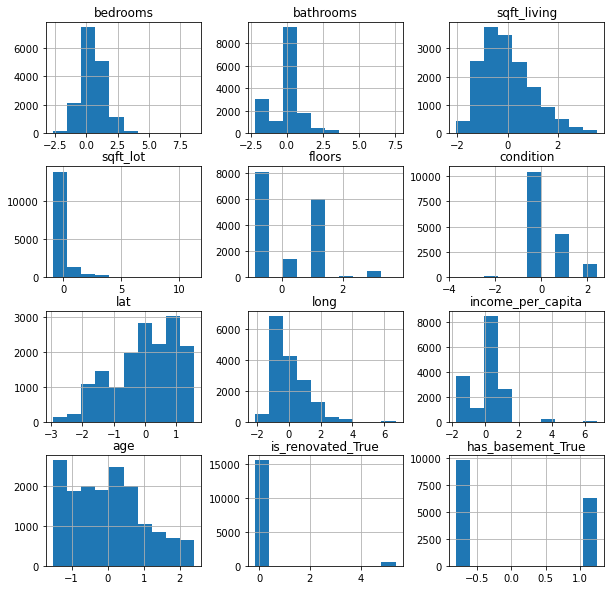

In [43]:
X_train_scaled.hist(figsize=[10,10]);


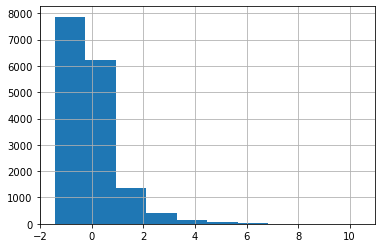

In [44]:
y_train_scaled.hist(figsize=[6,4]);


In [45]:
pred = sm.add_constant(X_train_scaled)
# model = sm.OLS(endog=y_train_scaled, exog=pred).fit()
# model.summary()
pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16104 entries, 5684 to 16868
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              16104 non-null  float64
 1   bedrooms           16104 non-null  float64
 2   bathrooms          16104 non-null  float64
 3   sqft_living        16104 non-null  float64
 4   sqft_lot           16104 non-null  float64
 5   floors             16104 non-null  float64
 6   condition          16104 non-null  float64
 7   lat                16104 non-null  float64
 8   long               16104 non-null  float64
 9   income_per_capita  16104 non-null  float64
 10  age                16104 non-null  float64
 11  is_renovated_True  16104 non-null  float64
 12  has_basement_True  16104 non-null  float64
dtypes: float64(13)
memory usage: 1.7 MB


In [46]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
reg.score(X_train_scaled, y_train_scaled)

0.6282028939791371

Standardize the X and Y test variables

In [47]:
X_test_scaled = (X_test - np.mean(X_test))/ np.std(X_test)
y_test_scaled = (y_test - np.mean(y_test))/ np.std(y_test)


Calculated the train and test mean squared error for comparison

In [48]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

y_hat_scaled_train = linreg.predict(X_train_scaled)
y_hat_scaled_test = linreg.predict(X_test_scaled)

train_scaled_mse = mean_squared_error(y_train_scaled, y_hat_scaled_train)
test_scaled_mse = mean_squared_error(y_test_scaled, y_hat_scaled_test)
print('Train Mean Squared Error:', train_scaled_mse)
print('Test Mean Squared Error:', test_scaled_mse)

Train Mean Squared Error: 0.3717971060208637
Test Mean Squared Error: 0.37876929024039635


QQ Plot of residuals:

<ipython-input-49-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


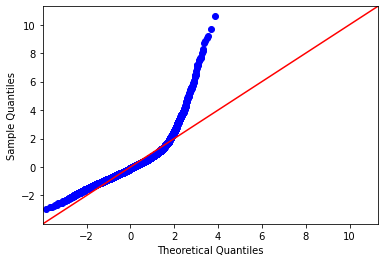

In [49]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This curved QQ plot suggests suggests the residuals are normally distributed. For that reason we will continue with logging in our next iteration. 

**Regression #2 : Using Log-Scaled & Standardized Variables**

Copy X_train from the preprocessing stage

In [50]:
X_train_log = pd.DataFrame.copy(X_train)


Drop`lat` and `long` since `long` already had an extremely low coefficient in iteration 1 (above), and was dropped during our previous attempt at the recursive feature selection (iteration 3 below). 

In [51]:
X_train_log.drop(['lat','long'], axis=1, inplace=True)

Identify the continuous variables we want to log, and apply it to the training data, while leaving the discrete variable unchanged 

In [52]:
log_col = ['income_per_capita', 'age','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
for col in X_train.columns:
    if col in log_col:
        new_log = np.log(X_train_log[col])
        X_train_log[col] = new_log

In [53]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


Standardize the X training and test variables

In [54]:
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_train_log_scaled

array([[-0.2621002 , -0.70516546, -0.91496687, ..., -0.09728338,
        -0.18573112, -0.80245642],
       [-0.2621002 ,  0.05043641,  0.26464041, ...,  1.13543224,
        -0.18573112,  1.2461736 ],
       [ 0.76681651,  0.05043641,  1.30956756, ...,  0.58522295,
        -0.18573112,  1.2461736 ],
       ...,
       [-4.1913702 , -1.77012648, -1.33614133, ...,  0.49224481,
        -0.18573112, -0.80245642],
       [ 1.56490631,  1.11539743,  2.14592647, ...,  0.49224481,
        -0.18573112,  1.2461736 ],
       [-0.2621002 , -0.70516546, -1.45365001, ...,  1.25167917,
        -0.18573112, -0.80245642]])

In [55]:
X_test_log = pd.DataFrame.copy(X_test)
log_col = ['income_per_capita', 'age','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
for col in X_test.columns:
    if col in log_col:
        new_log = np.log(X_test_log[col])
        X_test_log[col] = new_log
        

X_test_log.drop(['lat','long'], axis=1, inplace=True)

X_test_log_scaled = scaler.transform(X_test_log)
pd.DataFrame(X_test_log_scaled, columns = X_test_log.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,income_per_capita,age,is_renovated_True,has_basement_True
0,-0.262100,0.050436,0.591144,-0.319965,0.207811,0.964239,0.291611,0.975008,-0.185731,1.246174
1,1.564906,1.115397,1.462639,0.299380,1.025222,-0.618229,0.724851,-1.303224,-0.185731,1.246174
2,0.766817,0.050436,0.461212,0.202772,1.025222,0.964239,-0.256921,0.366560,-0.185731,-0.802456
3,0.766817,0.636527,1.188223,0.231185,1.025222,-0.618229,0.724851,-0.924106,-0.185731,-0.802456
4,-0.262100,0.636527,-0.069820,0.288328,1.025222,-0.618229,-1.786319,-0.097283,-0.185731,-0.802456
...,...,...,...,...,...,...,...,...,...,...
4022,0.766817,0.636527,-0.240852,-0.113672,1.025222,-0.618229,-2.053675,-0.992127,-0.185731,-0.802456
4023,-0.262100,1.115397,-1.290654,-3.020974,1.025222,-0.618229,0.291611,-1.592706,-0.185731,1.246174
4024,0.766817,0.050436,-0.424563,0.057715,0.207811,0.964239,-1.065834,0.418201,-0.185731,-0.802456
4025,-0.262100,0.050436,-0.692821,-0.851215,1.025222,-0.618229,-2.053675,-2.105371,-0.185731,-0.802456


Distribution of continuous variables look much better in comparison to iteration 1

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'income_per_capita'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'is_renovated_True'}>],
       [<AxesSubplot:title={'center':'has_basement_True'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

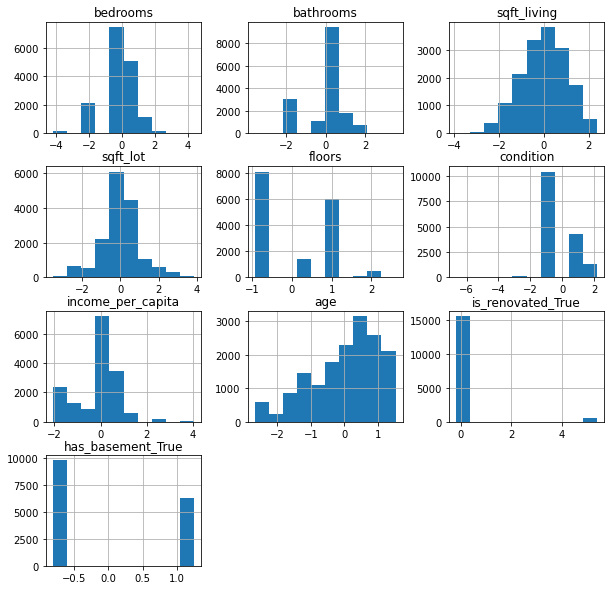

In [56]:
pd.DataFrame(X_train_log_scaled, columns = X_train_log.columns).hist(figsize=[10,10])

Distribution of dependent variable price also looks much better in comparison to iteration 1

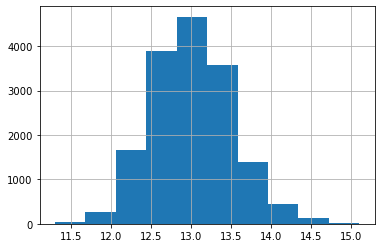

In [57]:
y_train_log.hist(figsize=[6,4]);

In [58]:
X_train_log_scaled = pd.DataFrame(X_train_log_scaled, columns = X_train_log.columns, index = X_train_log.index)
pred2 = sm.add_constant(X_train_log_scaled)
model2 = sm.OLS(endog=y_train_log, exog=pred2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     3207.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:09:42   Log-Likelihood:                -2923.7
No. Observations:               16104   AIC:                             5869.
Df Residuals:                   16093   BIC:                             5954.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0178      0.002   5691.748      0.000      13.013      13.022
bedrooms             -0.0617      0.003    -20.127      0.000      -0.068      -0.056
bathrooms             0.0288      0.004      7.388      0.000       0.021       0.036
sqft_living           0.3177      0.004     70.714      0.000       0.309       0.326
sqft_lot             -0.0308      0.003    -10.255      0.000      -0.037      -0.025
floors                0.0553      0.003     15.846      0.000       0.048       0.062
condition             0.0437      0.003     17.304      0.000       0.039       0.049
income_per_capita     0.2232      0.002     94.060      0.000       0.219       0.228
age                   0.0556      0.003     16.235      0.000       0.049       0.062
is_renovated_True     0.0188      0.002      7.844      0.000       0.014       0.023
has_basement_True     0.0057      0.003      2.002      0.045       0.000       0.011
==============================================================================
Omnibus:                      364.734   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.275
Skew:                           0.153   Prob(JB):                    1.93e-153
Kurtosis:                       3.977   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_test_log_scaled = pd.DataFrame(X_test_log_scaled, columns=X_test_log.columns, index=X_test.index)
X_test_log_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,income_per_capita,age,is_renovated_True,has_basement_True
7473,-0.262100,0.050436,0.591144,-0.319965,0.207811,0.964239,0.291611,0.975008,-0.185731,1.246174
17736,1.564906,1.115397,1.462639,0.299380,1.025222,-0.618229,0.724851,-1.303224,-0.185731,1.246174
20009,0.766817,0.050436,0.461212,0.202772,1.025222,0.964239,-0.256921,0.366560,-0.185731,-0.802456
17719,0.766817,0.636527,1.188223,0.231185,1.025222,-0.618229,0.724851,-0.924106,-0.185731,-0.802456
2241,-0.262100,0.636527,-0.069820,0.288328,1.025222,-0.618229,-1.786319,-0.097283,-0.185731,-0.802456
...,...,...,...,...,...,...,...,...,...,...
7079,0.766817,0.636527,-0.240852,-0.113672,1.025222,-0.618229,-2.053675,-0.992127,-0.185731,-0.802456
20448,-0.262100,1.115397,-1.290654,-3.020974,1.025222,-0.618229,0.291611,-1.592706,-0.185731,1.246174
9369,0.766817,0.050436,-0.424563,0.057715,0.207811,0.964239,-1.065834,0.418201,-0.185731,-0.802456
12097,-0.262100,0.050436,-0.692821,-0.851215,1.025222,-0.618229,-2.053675,-2.105371,-0.185731,-0.802456


Calculated the train and test mean squared error for comparison

In [60]:
linreg = LinearRegression()
linreg.fit(X_train_log_scaled, y_train_log)

y_hat_log_train = linreg.predict(X_train_log_scaled)
y_hat_log_test = linreg.predict(X_test_log_scaled)

# take inverse log
y_hat_train = np.exp(y_hat_log_train)
y_hat_test = np.exp(y_hat_log_test)

train_log_scaled_mse = mean_squared_error(y_train, y_hat_train,squared=False)
test_log_scaled_mse = mean_squared_error(y_test, y_hat_test,squared=False)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 192033.02407382947
Test Mean Squarred Error: 190350.894544238


QQ Plot of residuals:

<ipython-input-61-e51042142ea7>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


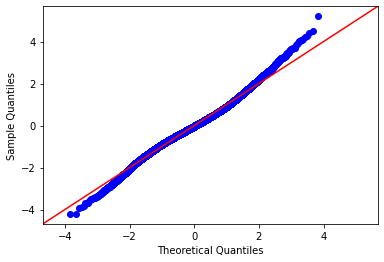

In [61]:
import scipy.stats as stats
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This QQ plot validates our assumption of normally distributed residuals

Plot regression results against one regressor:

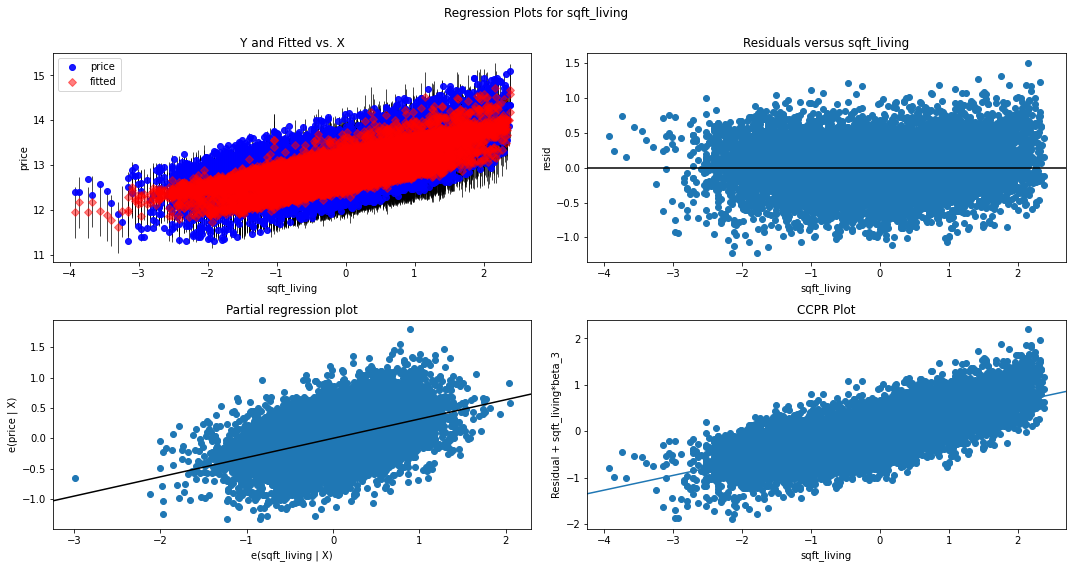

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig)
plt.show()

The top right Residual Plot suggests that we pass the assumption of homoskedacity. 

**Regression #3 : Recursive Feature Elimination**

Use RFE to eliminate "useless" estimators and fit model to new equation

In [63]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(pred2, y_train_log)

In [64]:
selector.support_


array([False,  True, False,  True, False,  True, False,  True,  True,
       False, False])

In [65]:
pred2.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'income_per_capita', 'age', 'is_renovated_True',
       'has_basement_True'],
      dtype='object')

In [66]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.05740185  0.32680968  0.06584526  0.22530156  0.06405302]
13.017758522381813


In [67]:
pred2_columns = list(pred2.columns)
tf = list(selector.support_)
filtered = np.array(pred2_columns)[np.array(tf)]
filtered
pred3 = pred2[filtered]
pred3

,bedrooms,sqft_living,floors,income_per_capita,age
5684,-0.262100,-0.914967,1.025222,-1.822166,-0.097283
4750,-0.262100,0.264640,-0.944265,0.291611,1.135432
6526,0.766817,1.309568,-0.944265,2.574400,0.585223
18152,0.766817,2.083164,-0.944265,0.855557,-0.737943
14496,1.564906,1.051888,0.207811,0.726335,0.392620
...,...,...,...,...,...
12034,-0.262100,-1.872152,-0.944265,-2.053675,0.340004
12758,-0.262100,-1.095701,-0.944265,-1.065834,0.905285
5717,-4.191370,-1.336141,-0.944265,-1.822166,0.492245
878,1.564906,2.145926,-0.944265,-0.197333,0.492245


In [68]:
pred3 = sm.add_constant(pred3)
model3 = sm.OLS(endog=y_train_log, exog=pred3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     6055.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:09:44   Log-Likelihood:                -3231.3
No. Observations:               16104   AIC:                             6475.
Df Residuals:                   16098   BIC:                             6521.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0178      0.002   5584.912      0.000      13.013      13.022
bedrooms             -0.0574      0.003    -18.581      0.000      -0.063      -0.051
sqft_living           0.3268      0.003     98.122      0.000       0.320       0.333
floors                0.0658      0.003     22.152      0.000       0.060       0.072
income_per_capita     0.2253      0.002     94.268      0.000       0.221       0.230
age                   0.0641      0.003     21.761      0.000       0.058       0.070
==============================================================================
Omnibus:                      294.630   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.928
Skew:                           0.073   Prob(JB):                    1.31e-128
Kurtosis:                       3.925   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_test_filtered = X_test_log_scaled[filtered]
X_test_filtered

X_train_filtered = X_train_log_scaled[filtered]
X_train_filtered

,bedrooms,sqft_living,floors,income_per_capita,age
5684,-0.262100,-0.914967,1.025222,-1.822166,-0.097283
4750,-0.262100,0.264640,-0.944265,0.291611,1.135432
6526,0.766817,1.309568,-0.944265,2.574400,0.585223
18152,0.766817,2.083164,-0.944265,0.855557,-0.737943
14496,1.564906,1.051888,0.207811,0.726335,0.392620
...,...,...,...,...,...
12034,-0.262100,-1.872152,-0.944265,-2.053675,0.340004
12758,-0.262100,-1.095701,-0.944265,-1.065834,0.905285
5717,-4.191370,-1.336141,-0.944265,-1.822166,0.492245
878,1.564906,2.145926,-0.944265,-0.197333,0.492245


Calculated the train and test mean squared error for comparison

In [70]:
linreg = LinearRegression()
linreg.fit(X_train_filtered, y_train_log)

# y_hat_log_scaled_train = linreg.predict(X_train_filtered)
# y_hat_log_scaled_test = linreg.predict(X_test_filtered)



# train_log_scaled_mse = mean_squared_error(y_train_log, y_hat_log_scaled_train)
# test_log_scaled_mse = mean_squared_error(y_test_log, y_hat_log_scaled_test)
# print('Train Mean Squarred Error:', train_log_scaled_mse)
# print('Test Mean Squarred Error:', test_log_scaled_mse)



y_hat_log_train = linreg.predict(X_train_filtered)
y_hat_log_test = linreg.predict(X_test_filtered)

# take inverse log
y_hat_train = np.exp(y_hat_log_train)
y_hat_test = np.exp(y_hat_log_test)

train_log_scaled_mse = mean_squared_error(y_train, y_hat_train,squared=False)
test_log_scaled_mse = mean_squared_error(y_test, y_hat_test,squared=False)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 195483.63468103137
Test Mean Squarred Error: 193810.58180603647


QQ Plot of residual:

<ipython-input-71-e566dfa41483>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


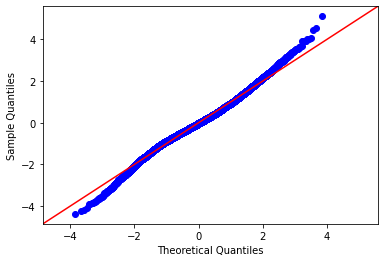

In [71]:
import scipy.stats as stats
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This QQ plot continues to validate our assumption of normally distributed residuals

Plot regression results against one regressor:

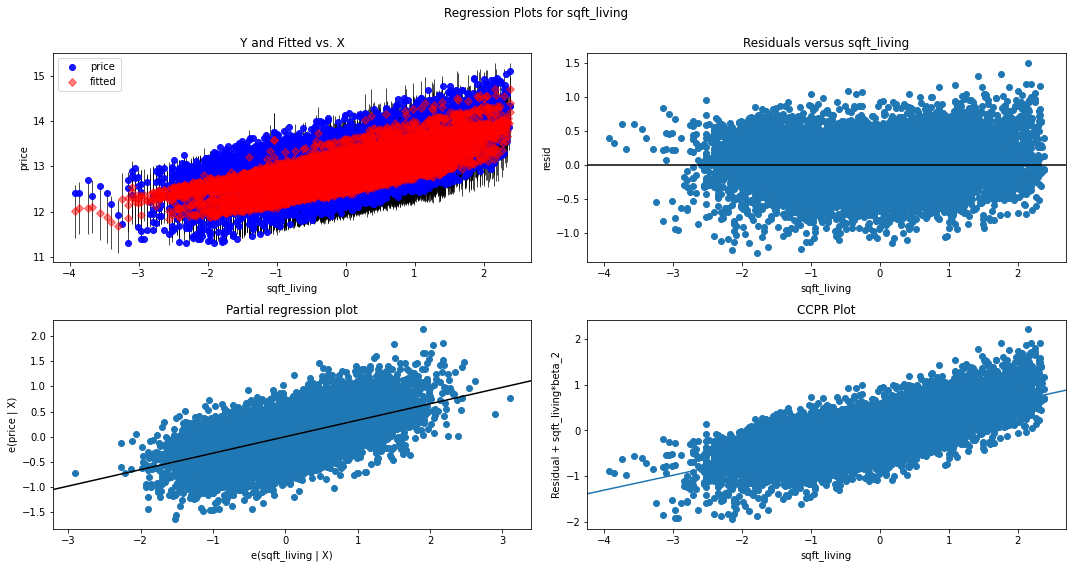

In [72]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "sqft_living", fig=fig)
plt.show()

The top right Residual Plot suggests that we pass the assumption of homoskedacity. 

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data[['income_per_capita', 'age','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0  income_per_capita  17.941718
1                age   6.425635
2           bedrooms  23.011368
3          bathrooms  24.869269
4        sqft_living  19.582651
5           sqft_lot   2.042221
6             floors  10.723329
7          condition  22.631433


# Visualizations

**Mean Price by # of Bathrooms**

Text(0, 0.5, 'Price (in Millions)')

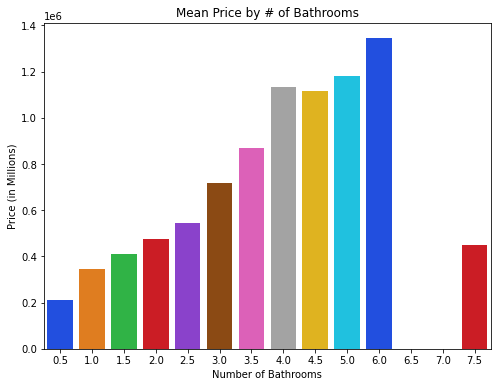

In [74]:
df_graph = dummy.groupby('bathrooms')['price'].mean()
df_graph=pd.DataFrame(df_graph)
df_graph.reset_index(inplace=True)
df_graph.loc[len(df_graph.index)] = ['6.5', 0] 
df_graph.loc[len(df_graph.index)] = ['7.0', 0] 
df_graph['bathrooms']=df_graph['bathrooms'].astype(float, copy=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='bathrooms', y='price', data=df_graph, palette="bright")
ax.set_title('Mean Price by # of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Price (in Millions)')
#plt.savefig('Bathrooms.png')
#ticks = np.arange(0,15,0.5)
#ax.set_xticks(ticks);

Text(0.5, 1.0, 'Price Vs. Square Feet')

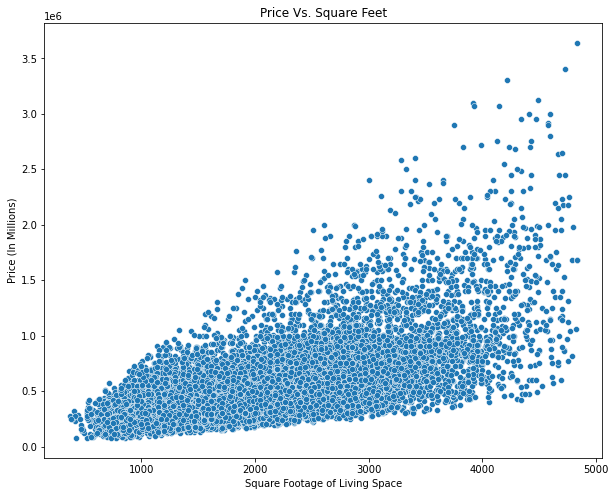

In [75]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='sqft_living', y='price', data=dummy)
ax.set_xlabel('Square Footage of Living Space')
ax.set_ylabel('Price (In Millions)')
ax.set_title("Price Vs. Square Feet")

AttributeError: 'Rectangle' object has no property 'bins'

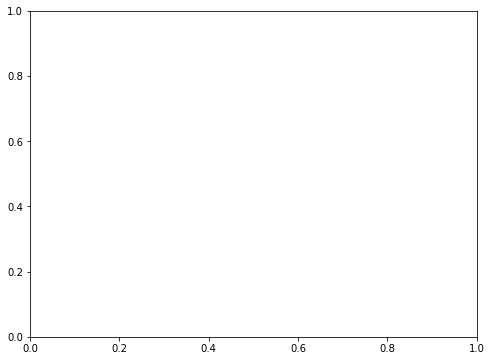

In [76]:
df_graph = dummy.groupby('income_per_capita')['price'].mean()
df_graph=pd.DataFrame(df_graph)
df_graph.reset_index(inplace=True)
# df_graph.loc[len(df_graph.index)] = ['6.5', 0] 
# df_graph.loc[len(df_graph.index)] = ['7.0', 0] 
df_graph['income_per_capita']=df_graph['income_per_capita'].astype(float, copy=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='income_per_capita', y='price', data=df_graph, palette="bright", bins = 5)
ax.set_title('Mean Price by # of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Price (in Millions)')

In [ ]:
x =dummy['income_per_capita']
y =dummy['price']
plt.scatter(x,y)